In [1]:
# analysis and plotting modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# matplotlib plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import image as mimage
from matplotlib import rcParams
from matplotlib import patches as mpatches
from matplotlib import dates as mdates
from matplotlib import lines as mlines
from matplotlib import colors as mcolors
from matplotlib import cm
from matplotlib import colorbar
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, FuncFormatter)

# handles dates and statistics
import datetime
import scipy.stats as stats

# custom scripts
from scripts import aesthetics
aesthetics.activate_paper_rcParams()

from scripts import lollipop
from scripts import phylogic_visualization
from scripts import copynumber

# other figure imports
from matplotlib_venn import venn2
from brokenaxes import brokenaxes

import palettable
bold_10 = palettable.cartocolors.qualitative.Bold_10.mpl_colors

# comutation plots
from comut import comut

# MPCproject paper figures

This notebook regenerates the figures for the Metastatic Prostate Cancer project (MPCproject) paper. To generate all figures, run all cells. Data included is processed and summary level to protect patient privacy.

The structure of the code is to first load in the requisite data, then create the figure in another code cell.

# Figure 1. Partnering with diverse patients to enhance our understanding of metastatic prostate cancer

In [2]:
# monkey patch stripplot to be deterministic
original_stripplot = sns.stripplot
def stripplot(*args, **kwargs):
    random_state = np.random.get_state()
    np.random.seed(42)
    p = original_stripplot(*args, **kwargs)
    np.random.set_state(random_state)
    return p
sns.stripplot = stripplot

In [3]:
# a minor formatting function
def format_func(value, tick_number):
    if value == 0:
        return "0"
    elif value == 1:
        return r"$\mathregular{10^{1}}$"
    elif value == 2:
        return r"$\mathregular{10^{2}}$"
    elif value == 3:
        return r"$\mathregular{10^{3}}$"
    elif value == 4:
        return r"$\mathregular{10^{4}}$"

In [4]:
# figure 1a - figure schematic created using biorender
study_schematic = mimage.imread('ref/images/mpcproject-overview.png')

# figure 1b - enrollment data
combined_enrollment_df = pd.read_csv('ref/data/enrollment-data.csv', parse_dates = [0])

# figure 1c - institution plot
institution_counts = pd.read_csv('ref/data/institution-counts.csv')

# figure 1d - primary care hpsa and medically underserved
num_patients_hpsa_mua = 628 # number with valid U.S. addresses
mua_patients = 150
hpsa_patients = 186
mua_hpsa_patients = 98
neither_patients = 390

# figure 1e - rural distances
rural_distance = pd.read_csv('ref/data/rural-distances.csv')

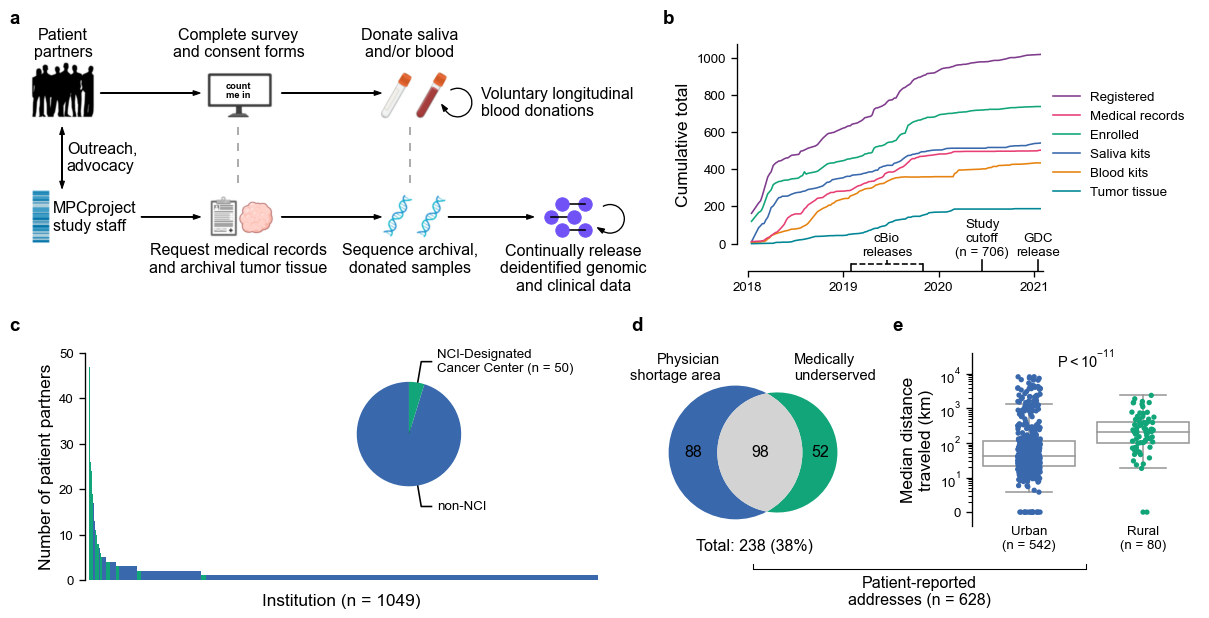

In [5]:
fig1 = plt.figure(figsize=(16, 8), tight_layout=False)

# create a gridspec - some empty axes used
gs = fig1.add_gridspec(8, 16, hspace = 1, wspace = 1, width_ratios = [3] + [1]*8 + [0.4] + [1]*5 + [4], 
                       height_ratios = [0.1,1,1,1,0.1,1,1,1])

updated_rcParams = {}
for k, v in aesthetics.paper_rcParams.items():
    if k.endswith('size') and type(v) == int:
        updated_rcParams[k] =  v
rcParams.update(updated_rcParams)

#####################
###### FIG 1A #######
#####################

ax = fig1.add_subplot(gs[:5, :9])

# input study schematic
ax.imshow(study_schematic, interpolation='gaussian')

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# set x and y scales based on panel dimensions to have accurate placing
xscale, yscale = 4800/64, 1980/26.4

# transform that aids in plotting
inv = ax.transData.inverted()

# patient and MPC project part
patients = ax.text(s = 'Patient\npartners', x = 5.6*xscale, y = 3.5*yscale, ha = 'center', va = 'bottom')
mpcproj = ax.text(s = 'MPCproject\nstudy staff', x = 4.5*xscale, y = 20*yscale, ha = 'left', va = 'center')
ax.arrow(x = 5.5*xscale, y = 10.6*yscale, dx = 0, dy = 6.4*yscale, length_includes_head=True, head_width = 0.5*xscale, color = 'black')
ax.arrow(x = 5.5*xscale, y = 17*yscale, dx = 0, dy = -6.4*yscale, length_includes_head=True, head_width = 0.5*xscale, color = 'black')
ax.text(s = 'Outreach,\nadvocacy', x = 6*xscale, y = 13.8*yscale, ha = 'left', va = 'center')

# # arrows to next part. To make lower arrow, we have to identify the bbox of the mpc project text in data coordinates, which can only take place after the rendering of the figure
ax.arrow(x = 9.5*xscale, y = 7*yscale, dx = 10.5*xscale, dy = 0, length_includes_head=True, head_width = 0.5*xscale, color = 'black')
plt.draw()
mpc_corner = inv.transform(mpcproj.get_window_extent().get_points()[1])
ax.arrow(x = mpc_corner[0] + 0.5*xscale, y = 20*yscale, dx = 6.25*xscale, dy = 0, length_includes_head=True, head_width = 0.5*xscale, color = 'black')

# # make the middle text - lines up with "Patients"
pts_corner = inv.transform(patients.get_window_extent().get_points())
survey = ax.text(s = 'Complete survey\nand consent forms', x = 24*xscale, y = np.mean([pts_corner[0][1], pts_corner[1][1]]) - 2*yscale, 
                 ha = 'center', va = 'center', multialignment = 'center')
ax.text(s = 'count\nme in', x = 24*xscale, y = 6.75*yscale, color = 'black', fontweight = 'bold', ha = 'center', 
        va = 'center', fontsize = 7, linespacing = 1)

request = ax.text(s = 'Request medical records\nand archival tumor tissue', x = 24*xscale, y = 24.4*yscale, 
                 ha = 'center', va = 'center', multialignment = 'center')
ax.plot([24*xscale, 24*xscale], [10.6*yscale, 17*yscale], color = 'black', linestyle = (0, (5, 5)), alpha = 0.4)

ax.arrow(x = 28.5*xscale, y = 7*yscale, dx = 10.5*xscale, dy = 0, length_includes_head=True, head_width = 0.5*xscale, color = 'black')
ax.arrow(x = 28.5*xscale, y = 20*yscale, dx = 10.5*xscale, dy = 0, length_includes_head=True, head_width = 0.5*xscale, color = 'black')

ax.plot([42*xscale, 42*xscale], [10.6*yscale, 17*yscale], color = 'black', linestyle = (0, (5, 5)), alpha = 0.4)

donate = ax.text(s = 'Donate saliva\nand/or blood', x = 42*xscale, y = np.mean([pts_corner[0][1], pts_corner[1][1]]) - 2*yscale, 
                 ha = 'center', va = 'center', multialignment = 'center')
sequence = ax.text(s = 'Sequence archival,\ndonated samples', x = 42*xscale, y = 24.4*yscale, 
                 ha = 'center', va = 'center', multialignment = 'center')

ax.arrow(x = 46*xscale, y = 20*yscale, dx = 9*xscale, dy = 0, length_includes_head=True, head_width = 0.5*xscale, color = 'black')

# place the release text box aligned at the top with sequence text box
cont_donations = ax.text(s = 'Voluntary longitudinal\nblood donations', x = 49.5*xscale,  y = 8*yscale, 
                 ha = 'left', va = 'center')
seq_box = inv.transform(sequence.get_window_extent().get_points())
seq_height = seq_box[1][1] - seq_box[0][1]
cont_release = ax.text(s = 'Continually release\ndeidentified genomic\nand clinical data', x = 51.5*xscale, y = 24.2*yscale + seq_height/2, 
                       ha = 'left', va = 'top', multialignment = 'center')

release_box = inv.transform(cont_release.get_window_extent().get_points())
release_center = (release_box[0][0] + release_box[1][0])/2
mpc_width = 2.4*xscale

# add MPC logo
coords = [((release_center - 1/2*mpc_width, 18.6*yscale, 2), (release_center + 1/2*mpc_width, 18.6*yscale, 1)),
          ((release_center - mpc_width, 20*yscale, 1), (release_center, 20*yscale, 2)),
          ((release_center - 1/2*mpc_width, 21.4*yscale, 2), (release_center + 1/2*mpc_width, 21.4*yscale, 1))]

for pair in coords:
    for circle in pair:
        ax.scatter(x = circle[0], y = circle[1], color = '#7152F6', s = 100, zorder = circle[2])
    ax.plot([pair[0][0], pair[1][0]], [pair[0][1], pair[0][1]], zorder = 1, color = 'black')

# add loops
center = np.array([47*xscale, 8*yscale])
radius = np.array([3*xscale, 3*yscale])
point2 = center + radius * np.array([np.cos(np.radians(150)), np.sin(np.radians(150))])
ax.arrow(x = point2[0]+1.06*xscale, y = point2[1]-1.12*yscale, dx = -0.14*xscale, dy = -0.2*yscale, length_includes_head = True, head_width = 0.5*xscale, color = 'black')
arc = mpatches.Arc(center, radius[0], radius[1], angle = 0, theta1 = -120, theta2=150.0, linewidth = 1)
ax.add_patch(arc)

# loop next to MPC logo
center = np.array([63*xscale, 20.2*yscale])
radius = np.array([3*xscale, 3*yscale])
point2 = center + radius * np.array([np.cos(np.radians(150)), np.sin(np.radians(150))])
ax.arrow(x = point2[0]+1.4*xscale, y = point2[1]-0.5*yscale, dx = -0.14*xscale, dy = -0.08*yscale, length_includes_head = True, head_width = 0.5*xscale, color = 'black')
arc = mpatches.Arc(center, radius[0], radius[1], angle = 0, theta1 = -120, theta2=120.0, linewidth = 1)
ax.add_patch(arc)

sns.despine(ax = ax, bottom = True, left = True)

#####################
###### FIG 1B #######
#####################

# create gridspec. Space left at bottom for a blank axis
fig1b = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[1:4, 10:-1], height_ratios = [8,1], hspace = 0)
ax_1b_timeline = fig1.add_subplot(fig1b[1])
ax_1b = fig1.add_subplot(fig1b[0], sharex = ax_1b_timeline)

palette = {'Registered': bold_10[0], 'Medical records': bold_10[4], 'Enrolled': bold_10[1], 'Saliva kits': bold_10[2], 
           'Blood kits': bold_10[6], 'Tumor tissue': bold_10[7]}

# create lineplot
sns.lineplot(data = combined_enrollment_df, x = 'Date', y = 'value', hue = 'variable', ax = ax_1b, palette = palette)
ax_1b.tick_params(axis = 'x', rotation = 100)
ax_1b.set_ylabel('Cumulative total')
ax_1b.set_xlabel('')
sns.despine(ax = ax_1b, bottom = True)

# create legend
handles, labels = ax_1b.get_legend_handles_labels()
leg_elements = {label: handle for label, handle in zip(labels, handles)}
order = ['Registered', 'Medical records', 'Enrolled', 'Saliva kits', 'Blood kits', 'Tumor tissue']
leg_elements = {key: leg_elements[key] for key in order}
ax_1b.legend(handles = leg_elements.values(), labels = leg_elements.keys(), bbox_to_anchor = (1,0.5), fontsize = 10)
    
ax_1b.set_ylim(-10, None)
ax_1b.spines['left'].set_bounds([0, ax_1b.get_ylim()[1]])
ax_1b.tick_params(axis = 'x', length = 0)
ax_1b.get_xaxis().set_visible(False)

# adjust axis
left, right = ax_1b.get_xlim()
ax_1b.set_xlim(left, (right - left) * 0.95 + left)

# Now we add annotations
first_cbio = datetime.datetime(2019, 2, 1, 0, 0, 0)
second_cbio = datetime.datetime(2019, 11, 1, 0, 0, 0)
middle = first_cbio + (second_cbio - first_cbio)/2

dates = {'cBio\nreleases': [middle, 0.5],
         'Study\ncutoff\n(n = 706)': [datetime.datetime(2020, 6, 15, 0, 0, 0), 0.5],
         'GDC\nrelease': [datetime.datetime(2021, 1, 15, 0, 0, 0), 0.5]}

# unfortunately, the text labels on the timeline cut into the enrollment axis. This means
# they need to be defined in figure coordinates
ax_1b_timeline_transform = ax_1b_timeline.transData
fig1_inv_transform = fig1.transFigure.inverted()

ax_1b_timeline.set_ylim([0, 1])
for ev, dt in dates.items():
    plot_loc = dt
    plot_loc[0] = mdates.date2num(plot_loc[0])
    
    # determine figure coordinates and add
    fig_coords = fig1_inv_transform.transform(ax_1b_timeline_transform.transform(plot_loc))
    fig1.text(s = ev, x = fig_coords[0], y = fig_coords[1], ha = 'center', fontsize = 10, va = 'bottom')

    if ev != 'cBio\nreleases':
        ax_1b_timeline.plot([dt[0], dt[0]], [0, 0.42], color = 'black')
    
    else:
        ax_1b_timeline.plot([first_cbio, first_cbio], [0, 0.25], color = 'black')
        ax_1b_timeline.plot([second_cbio, second_cbio], [0.25, 0], color = 'black')
        ax_1b_timeline.plot([first_cbio, second_cbio], [0.25, 0.25], color = 'black', linestyle = 'dashed')
        ax_1b_timeline.plot([middle, middle], [0.25, 0.42], color = 'black', linestyle = 'dashed')

# handle dates
years = mdates.YearLocator()   # every year
years_fmt = mdates.DateFormatter('%Y')
ax_1b_timeline.xaxis.set_major_locator(years)
ax_1b_timeline.xaxis.set_major_formatter(years_fmt)
ax_1b_timeline.tick_params(axis = 'x', rotation = 0)

sns.despine(ax = ax_1b_timeline, left = True)
ax_1b_timeline.tick_params(axis = 'y', length = 0)
ax_1b_timeline.set_yticklabels([])
xlims = (mdates.date2num(datetime.datetime(2018, 1, 1, 0, 0, 0)), 
         mdates.date2num(datetime.datetime(2021, 2, 1, 0, 0, 0)))
ax_1b_timeline.spines['bottom'].set_bounds(xlims)

blank_ax = ax_1b_timeline = fig1.add_subplot(gs[1:4, -1])
blank_ax.axis('off')

#####################
###### FIG 1C #######
#####################

# create a gridspec, add some spacers
fig1cde = gridspec.GridSpecFromSubplotSpec(1, 5, subplot_spec = gs[5:, :], width_ratios = [0.6, 9, 4, 0.4, 4], wspace = 0.2)

ax_1c = fig1.add_subplot(fig1cde[1])

# create institution plot
institution_count_plot = institution_counts.copy().sort_values(by = ['COUNT', 'NCI'], ascending = False).reset_index()
barplot = ax_1c.bar(range(len(institution_count_plot)), institution_count_plot['COUNT'], width = 1.01, color = bold_10[2])

# annotate nci centers
nci_centers = institution_count_plot[institution_count_plot['NCI']]
for index, row in nci_centers.iterrows():
    barplot[index].set_facecolor(bold_10[1])

# adjust axes
sns.despine(bottom = True, ax = ax_1c)
ax_1c.set_xticks([])
ax_1c.set_xlim([-10, len(institution_count_plot)])
ax_1c.set_ylim([0, 50])
ax_1c.set_ylabel('Number of patient partners')
ax_1c.set_xlabel('Institution (n = {})'.format(len(institution_count_plot)), labelpad = 10)

# add pie chart
proportions = institution_count_plot['NCI'].value_counts()/len(institution_count_plot)
pie_chart_loc = [0.30, 0.23, 0.17]
pie_chart_ax = fig1.add_axes([pie_chart_loc[0], pie_chart_loc[1], pie_chart_loc[2], pie_chart_loc[2]])
pie_chart_ax.axis('equal')
pie_chart_ax.pie(proportions, colors=[bold_10[2], bold_10[1]], startangle=90)

# draw line to connect to labels. Line drawn from center to intersect smaller pie piece
center_pie_ax_loc = ax_1c.transAxes.inverted().transform(fig1.transFigure.transform((pie_chart_loc[0] + pie_chart_loc[2]/2, pie_chart_loc[1] + pie_chart_loc[2]/2)))
angle = np.pi/2 - len(institution_counts[institution_counts['NCI']])/(len(institution_counts))*2*np.pi/4

end = np.array(center_pie_ax_loc) + 0.32*np.array([np.cos(angle), np.sin(angle)])

ax_1c.plot([center_pie_ax_loc[0], end[0], end[0] + 0.02], 
           [center_pie_ax_loc[1], end[1], end[1]], 
           transform = ax_1c.transAxes, color = 'black')

ax_1c.text(s = 'NCI-Designated\nCancer Center (n = {})'.format(institution_counts['NCI'].sum()), ha = 'left', va = 'center',
           x = end[0] + 0.03, y = end[1], transform = ax_1c.transAxes, fontsize = 10)

# draw the other line to label non-NCI centers. It's a reflection of the first
angle_2 = 3*np.pi/2 + len(institution_counts[institution_counts['NCI']])/(len(institution_counts))*2*np.pi/4
end_2 = np.array(center_pie_ax_loc) + 0.32*np.array([np.cos(angle_2), np.sin(angle_2)])
ax_1c.plot([center_pie_ax_loc[0], end_2[0], end_2[0] + 0.02], 
           [center_pie_ax_loc[1], end_2[1], end_2[1]], 
           transform = ax_1c.transAxes, color = 'black')
ax_1c.text(s = 'non-NCI', ha = 'left', va = 'center',
           x = end_2[0] + 0.03, y = end_2[1], transform = ax_1c.transAxes, fontsize = 10)

#####################
###### FIG 1D #######
#####################

fig1d = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=fig1cde[2], height_ratios = [0.3, 4,1], hspace = 0.1)
venn_ax = fig1.add_subplot(fig1d[1])
blank_ax = fig1.add_subplot(fig1d[2]).axis('off')
blank_ax = fig1.add_subplot(fig1d[0]).axis('off')

# create venn diagram
out = venn2(subsets = [hpsa_patients - mua_hpsa_patients, mua_patients - mua_hpsa_patients, mua_hpsa_patients],
      set_colors=(bold_10[2], bold_10[1]), alpha = 1, ax = venn_ax,
      set_labels = ('Physician\nshortage area', 'Medically\nunderserved'))

# increase size of numbers
for text in out.subset_labels:
    text.set_fontsize(12)

# shift the labels to above the pie chart. Requires reflection over x axis
ys = []
for text in out.set_labels:
    text.set_fontsize(11)
    pos = text.get_position()
    text.set_position((pos[0], -1*pos[1]))
    text.set_va('bottom')
    ys.append(-1*pos[1])

# adjust texts to line up with each other
for text in out.set_labels:
    pos = text.get_position()
    text.set_position((pos[0], np.mean(ys)))

# we scoot over the labels proportional to the radii of the circles, which are area weighted
mua_to_hpsa_scale = np.sqrt(149/184)
buffer = 0.8

# always ordered left to right
for text, buffer in zip(out.set_labels, [buffer, buffer*mua_to_hpsa_scale]):
    pos = text.get_position()
    text.set_position((pos[0] + buffer*pos[0], pos[1]))

# now we add the total
total = mua_patients + hpsa_patients - mua_hpsa_patients
percentage = int(round(total/num_patients_hpsa_mua * 100))
venn_ax.text(s = f'Total: {total} ({percentage}%)', x = 0, y = -0.7, ha = 'center', va = 'center')
venn_ax.patches[2].set_facecolor('lightgray')

#####################
###### FIG 1E #######
#####################

fig1e = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=fig1cde[4], height_ratios = [4, 1], hspace = 0.1)
ax_1e = fig1.add_subplot(fig1e[0])
blank_ax = fig1.add_subplot(fig1e[1]).axis('off')

# add distance data
order = [False, True]
sns.stripplot(x = 'Rural', y = 'Log10_distance', data = rural_distance, 
              order = order, ax = ax_1e, s = 4, palette = {False: bold_10[2], True: bold_10[1]})
sns.boxplot(x = 'Rural', y = 'Log10_distance', data = rural_distance, 
              order = order, color = 'white', ax = ax_1e, fliersize = 0)

# calculate and plot p values
n_data = rural_distance[~(rural_distance['Rural'])]
y_data = rural_distance[(rural_distance['Rural'])]

value, p = stats.mannwhitneyu(n_data['Log10_distance'], y_data['Log10_distance'], alternative = 'two-sided')

# p < 10^-11
ax_1e.text(x = 0.5, y = 1.03, s = "$\mathregular{P<10^{-11}}$", 
           ha = 'center', va = 'top', fontsize = 11, transform = ax_1e.transAxes)

sns.despine(ax = ax_1e, bottom = True)
ax_1e.set_ylim([-0.4, 4.6])

ax_1e.set_xlabel('')
ax_1e.set_ylabel('Median distance\ntraveled (km)')

counts = rural_distance.groupby('Rural').size()
ax_1e.set_xticklabels(['Urban\n(n = {})'.format(counts.loc[False]), 
                       'Rural\n(n = {})'.format(counts.loc[True])])

# data is in log space, so make yticklabels in that form
ax_1e.yaxis.set_ticks([np.log10(x) for p in range(0,4) for x in np.linspace(10**p, 10**(p+1), 10)], minor=True)
ax_1e.yaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax_1e.tick_params(axis = 'x', length = 0, pad = 0)

#####################
#### 1d/e Label  ####
#####################

middle_ax = fig1.add_subplot(fig1cde[3])
middle_ax.text(x = 0.5, y = 0.02, s = 'Patient-reported\naddresses (n = {})'.format(num_patients_hpsa_mua), ha = 'center', va = 'top')
middle_ax.axis('off')

# next we add a line
line_left = fig1_inv_transform.transform(venn_ax.transAxes.transform((0.5, 1)))[0]
line_right = fig1_inv_transform.transform(ax_1e.transAxes.transform((0.5, 1)))[0]
line_y = fig1_inv_transform.transform(middle_ax.transAxes.transform((0.5, 0.05)))[1]

l = mlines.Line2D([line_left, line_right], [line_y, line_y], color = 'black',
                   linewidth = 0.8, transform=fig1.transFigure, figure=fig1)

# add some extenders?
l1 = mlines.Line2D([line_left, line_left], [line_y, line_y*1.04], color = 'black',
                   linewidth = 0.8, transform=fig1.transFigure, figure=fig1)
l2 = mlines.Line2D([line_right, line_right], [line_y, line_y*1.04], color = 'black',
                   linewidth = 0.8, transform=fig1.transFigure, figure=fig1)

fig1.lines.extend([l, l1, l2])

#####################
### Figure labels  ##
#####################

top_row_y = 0.85
bottom_row_y = 0.45

x_coords = [0.125, 0.55, 0.125, 0.53, 0.70]
for label, coord in zip(['a', 'b', 'c', 'd', 'e'], x_coords):
    y = top_row_y if label < 'c' else bottom_row_y
    fig1.text(s = label, x = coord, y = y, transform = fig1.transFigure, weight = 'bold', fontsize = 14)

fig1.savefig('figures/figure1.png', dpi = 300, bbox_inches = 'tight')
fig1.savefig('figures/figure1.svg', bbox_inches = 'tight')

# Figure 2. Patient voices reveal the landscape of living with metastatic prostate cancer

In [6]:
# figure 2a - metastatic locations
plot_data = pd.read_csv('ref/data/met-locations.csv')

# figure 2b-d - bar charts
other_prd_freqs = pd.read_csv('ref/data/bar-charts.csv')

# figure 2e - therapy overlap
therapy_overlap_df = pd.read_csv('ref/data/prd-overlap.csv')

# figure 2f - alternative medications
bar_df = pd.read_csv('ref/data/alt-med.csv')
category_counts = pd.read_csv('ref/data/alt-med-counts.csv')

In [ ]:
fig2 = plt.figure(figsize=(12, 12))
gs = fig2.add_gridspec(12, 4, width_ratios=[-0.18, 1.6, -0.25, 1], height_ratios = [1]*3 + [0.2] + [1]*3 + [0.8] + [1.1]*3 + [-0.1], wspace = 0.7, hspace = 0.5)

#####################
###### FIG 2A #######
#####################

ax_2a = fig2.add_subplot(gs[:3, :2])
sns.barplot(x = 'Location', y = 'Count', data = plot_data, ax = ax_2a,
            color = 'darkgrey')
sns.despine(ax = ax_2a, bottom = True)
ax_2a.tick_params(axis = 'x', length = 0)
ax_2a.set_xlim([-0.7, None])
ax_2a.set_xlabel('')
ax_2a.set_ylabel('Number of patient partners')

#####################
###### FIG 2B-2D ######
#####################

ax_2bd = fig2.add_subplot(gs[4:7, :2])
order = ['INITIAL_ADV_METASTATIC_DIAG', 'FAMILY_MEMBERS_WITH_PC_BC', 'HAD_OTHER_CANCERS']
barplot = sns.barplot(x = 'variable', y = 'count', hue = 'value', data = other_prd_freqs, 
                      ax = ax_2bd, palette = {'No': bold_10[2], 'Yes': bold_10[1], 'Don\'t\nknow': 'darkgrey'}, order = order,
                      hue_order = ['No', 'Yes', 'Don\'t\nknow'])
sns.despine(ax = ax_2bd, bottom = True)

ax_2bd.tick_params(axis = 'x', length = 0)
ax_2bd.set_xlabel('')
ax_2bd.set_ylabel('Number of patient partners')

new_xticks = [patch.xy[0] + patch.get_width()/2 for patch in barplot.patches]
ax_2bd.set_xticks(new_xticks)
ax_2bd.set_xticklabels(['No']*3 + ['Yes']*3 + ['Don\'t\nknow']*3)

ax_2bd.get_legend().remove()

# add xlabels
for loc, label in zip([0, 1, 2], ['Initial metastatic\ndiagnosis', 'Family history of\nprostate/breast cancer', 'Other cancers']):
    ax_2bd.text(s = label, y = ax_2bd.get_ylim()[1] * -0.18, x = loc, ha = 'center', va = 'top')

#####################
###### FIG 2E  ######
#####################

ax_2e = fig2.add_subplot(gs[8:, 1:2])

order = ['1st Line ADT', 'Prostatectomy', '2nd Line ADT', 'Chemotherapy', 'Supportive Care', 'Clinical Trial', 'Immunotherapy', 'Nuclear Medicine']

width = 0.8
spacing = 0.03
prd_locs = [i + width/4 for i in range(8)]
abs_locs = [i - width/4 for i in range(8)]

ax_2e.barh(y = prd_locs, width = therapy_overlap_df['prd_%'][::-1], color = bold_10[2], height = width/2, label = 'Patient surveys\n(n = 639)')
ax_2e.barh(y = abs_locs, width = therapy_overlap_df['abstraction_%'][::-1], color = bold_10[1], height = width/2, label = 'Medical records\n(n = 119)')
ax_2e.set_yticks(range(8))

ax_2e.set_xlabel('Proportion of patient partners')
ax_2e.set_ylabel('')
ax_2e.set_xlim([0, 1])
sns.despine(left = True, ax = ax_2e)
ax_2e.tick_params(axis='y', length = 0)

# add the report overlap values
for i, drug_class in enumerate(order[::-1]):
    loc = np.max([therapy_overlap_df.set_index('Therapy').loc[drug_class, 'prd_%'], therapy_overlap_df.set_index('Therapy').loc[drug_class, 'abstraction_%']])
    ax_2e.plot([loc + spacing, loc + spacing], [i + width/3, i - width/3], color = 'black')
    ax_2e.text(x = loc + spacing + 0.02, y = i, s = '{:.0f}'.format(100*therapy_overlap_df.set_index('Therapy').loc[drug_class, 'report_overlap']), ha = 'left', va = 'center', fontsize = 11)
    
ax_2e.legend(bbox_to_anchor = (1, 0.5), fontsize = 10)
handles, labels = ax_2e.get_legend_handles_labels()
vertical_line = mlines.Line2D([], [], color='black', marker='|', linestyle='None',
                          markersize=10, markeredgewidth=1, label='Vertical line')
ax_2e.set_yticklabels(['1st line ADT', 'Prostatectomy', '2nd line ADT', 'Chemotherapy', 'Supportive care', 'Clinical trial', 'Immunotherapy', 'Nuclear medicine'][::-1])
handles.append(vertical_line)
labels.append('Report overlap (%)')
ax_2e.legend(handles, labels, loc = 'center right', bbox_to_anchor = (1.05, 0.3), fontsize = 10)

#####################
###### FIG E2F ######
#####################

ax = fig2.add_subplot(gs[:-1, 3])

ax.barh(y = bar_df['y'], width = bar_df['%_patients'], color = 'darkgrey')

for bp in [2.75, 8.25]:
    ax.axhline(y = bp, color = 'black', linestyle = (0, (5, 6)), alpha = 0.5)

class_counts = category_counts.set_index('category').loc[['DIET', 'SUPPLEMENTS', 'DRUGS']].values[:, 0]

for i, cat in enumerate([('Diet/lifestyle', 10.5), ('Supplements',  5.5), ('Non-cancer\nmedications', 1)]):
    label = cat[0]
    ax.text(x = ax.get_xlim()[1], y = cat[1], s = label, va = 'center', ha = 'left', multialignment = 'center', weight = 'bold')
    n_label = '\n'*2 if label != 'Non-cancer\nmedications' else '\n'*3
    ax.text(x = ax.get_xlim()[1], y = cat[1], s = n_label + '(n = {})'.format(class_counts[i]), va = 'center', ha = 'left', multialignment = 'center')
    
ax.set_xlabel('Percentage of patient partners\nthat answered lifestyle question (%)')
ax.set_ylabel('')
sns.despine(left = True, ax = ax)
ax.tick_params(axis='y', length = 0)
ax.set_yticks(bar_df['y'])
ax.set_yticklabels(bar_df['alt_med'], fontsize = 11)
ax.set_ylim([-0.6, 12.4])

ax.tick_params(axis = 'x', labelsize=11)
ax.tick_params(axis='y', pad=8)

# # add small graphics. Needs to be based on figure coordinates unfortunately
fig_inv_transform = fig2.transFigure.inverted()
ax_transform = ax.transData

# dictionary for adjusting
tweak_dict = {'aspirin': [2.4, 0.5], 'increase exercise': [0.3, 0.7], 'pomegranate': [2.2, 0.52], 'vitamin d': [0, 0.64], 'turmeric': [0.6, 0.6], 'statins': [0, 0.8]}

# default distance from bar and dim of image
defaults = [0, 0.6]

# need to define the conversion from y coordinates to x to make a square axis
aspect_ratio = (ax_transform.transform((0, 1)) - ax_transform.transform((0, 0)))[1]/(ax_transform.transform((1, 0)) - ax_transform.transform((0, 0)))[0]

plotted_cats = {0: ['plant-based', 'increase exercise'], 1: ['vitamin d', 'turmeric', 'pomegranate'], 2: ['statins', 'aspirin']}
for y_index, cats in plotted_cats.items():

    # find where these images are plotted
    y = [10.5, 5.5, 0.9][y_index] - 0.75
    x = ax.get_xlim()[1]
    
    # plot each category
    for i, cat in enumerate(cats):
        
        buffer, size = tweak_dict.get(cat, defaults)
        
        # define coordinates of axis in data coordinates
        bottom_left = (x + buffer, y - size / 2)
        top_right = (x + aspect_ratio * size + buffer, y + size / 2)
        
        y_buffer = 0
    
        # convert to fig coordinates
        bottom_left_fig = fig_inv_transform.transform(ax_transform.transform(bottom_left))
        top_right_fig = fig_inv_transform.transform(ax_transform.transform(top_right))
        left_x, left_y = bottom_left_fig
        width, height = top_right_fig[0] - bottom_left_fig[0], top_right_fig[1] - bottom_left_fig[1]
        image_ax = fig2.add_axes([left_x + width*i, left_y + y_buffer, width, height])
    
        # load the image
        img_path = 'ref/images/{}.png'.format(cat)
        image = mimage.imread(img_path)
        image_ax.imshow(image, interpolation='gaussian')

        image_ax.get_xaxis().set_visible(False)
        image_ax.get_yaxis().set_visible(False)
        sns.despine(left = True, bottom = True, ax = image_ax)
    
# add panel labels
# add panel labels
xcoords = [0.07, 0.07, 0.26, 0.40, 0.07, 0.56]
ycoords = [0.88, 0.64, 0.64, 0.64, 0.35, 0.88]

for label, xcoord, ycoord in zip(['a', 'b', 'c', 'd', 'e', 'f'], xcoords, ycoords):
    fig2.text(s = label, x = xcoord, y = ycoord, transform = fig2.transFigure, weight = 'bold', fontsize = 14)

fig2.savefig('figures/figure2.png', dpi = 300, bbox_inches = 'tight')
fig2.savefig('figures/figure2.svg', bbox_inches = 'tight')

# Figure 3. Donated tumor and cell-free DNA samples obtained through patient partnership recapitulate known genomic findings in metastatic prostate cancer

This figure includes the comutation plot, so it's data preprocessing is more involved. See https://github.com/vanallenlab/comut for package documentation.

In [ ]:
###### figure 3a - CoMut data ######

# _T suffix indicates archival sample, _B indicates a blood sample. Samples ordered by mutation frequency
sample_order = pd.read_csv('ref/data/comut_data/sample-order.csv')['sample'].to_list()

# next we load the categorical data - everything except for mutational burden
categorical_data = pd.read_csv('ref/data/comut_data/categorical-data.csv')

# finally, we load the mutational burden
mutation_burden = pd.read_csv('ref/data/comut_data/mutation-burden.csv', dtype = {'value': float})

### next we define various properties about the comut. These will determine its structure and order
# first we define the order of mutations and copy number variants - from the bottom up
mut_order = ['CDK12', 'PTEN', 'KMT2D', 'SPOP', 'TP53']
cna_order = ['BRCA2', 'TP53', 'NKX3-1', 'PTEN', 'MYC', 'AR']

# then we set the relative priority of copy number events - amplifications should always be shown in the upper left triangle, etc
cn_value_order = ['Allelic amplification', 'Allelic deletion', 'aCN = 0', 'Complex', 'CN-LOH', 'Baseline']

# next we define the color mappings for all the comut's data. We'll only define the larger colormaps here -
# others will be as we plot the comut 
vivid_10 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
balance_6 = palettable.cmocean.diverging.Balance_6.mpl_colors

mut_mapping = {'Missense': vivid_10[5], 'Nonsense': vivid_10[0], 'In frame indel': vivid_10[1],
               'Frameshift indel': vivid_10[4], 'Splice site': vivid_10[9]}

cna_mapping = {'Baseline': 'white', 'Allelic amplification': balance_6[-2], 'Allelic deletion': balance_6[1],
               'aCN = 0': 'darkgrey', 'CN-LOH': vivid_10[8], 'Complex': vivid_10[2]}

# taken from Meng Xiao He - colormap for gleason score
gleason_cmap = [[0,0,0,0],
                palettable.cartocolors.qualitative.Bold_10.colors[6] + [255 / 4],
                palettable.cartocolors.qualitative.Bold_10.colors[9] + [255 / 2],
                palettable.cartocolors.qualitative.Bold_10.colors[4] + [255 * .75],
                palettable.cartocolors.qualitative.Bold_10.colors[8] + [255],
                palettable.cartocolors.qualitative.Bold_10.colors[0] + [255]]
gleason_listed_cmap = mcolors.ListedColormap([np.array(x) / 255 for x in gleason_cmap])
gleason_mapping = dict(zip(['NR', '6', '7', '8', '9', '10'], np.array(gleason_cmap)/255))

# finally, we define the structure of the comutation plot. Struture defined from the bottom up
structure = [['Copy number alteration'], ['WGD'], ['Mutation type', 'Purity', 'Gleason score', 'Diagnosis'], ['Mutation burden']]

##### figure 3b - mutation signatures ######

# notably, the samples here don't match the sample names used in the comut. But they are still consistent
# e.g. MPC_0062_T1_Saliva == MPCproject_0062_T
mutation_signatures = pd.read_csv('ref/data/mutation-signatures.csv').set_index('sample')

sig_color_dict = {'1 (Aging)': 'grey', 'Other': 'white', '2/13 (APOBEC)': vivid_10[4],
              '6 (MMR)': vivid_10[0], '3 (HRD)': vivid_10[1]}
alpha_dict = {'1 (Aging)': 0.5}

##### figure 3c - kmt2c lollipop plot ######
kmt2c_data = pd.read_csv('ref/data/kmt2c-lollipop.csv')
lolliplot = lollipop.LollipopPlot(kmt2c_data, 'KMT2C', value_col = 'CCF')

# we hardcode the domains because sometimes lookup from pfam crashes due to server irregularities.
domains = [['zf-HC5HC2H', 252, 331, vivid_10[-2]],
           ['PHD', 388, 438, vivid_10[5]],
           ['PHD', 959, 1057, vivid_10[5]],
           ['zf-HC5HC2H', 4400, 4510, vivid_10[-2]],
           ['FYRN', 4551, 4602, balance_6[1]],
           ['FYRC', 4608, 4692, vivid_10[0]],
           ['SET', 4782, 4887, vivid_10[-1]]]
lolliplot.domains = domains
lolliplot.length = 4911

##### figure 3de - germline mutations
groupby_seq = pd.read_csv('ref/data/family-history-germline.csv')
wide_gene_level_data = pd.read_csv('ref/data/germline-hits.csv')

In [ ]:
# to create the plot, we first need to create the comut object. We do that in this cell
mpc_comut = comut.CoMut()
mpc_comut.samples = sample_order

# add whole genome doubling
mpc_comut.add_categorical_data(categorical_data.query('category == "WGD"'), 
                               mapping = {'No': 'white', 'Yes':'darkgrey'}, name = 'WGD')

# add copy number
mpc_comut.add_categorical_data(categorical_data[categorical_data['value'].isin(cna_mapping.keys())], 
                               category_order = cna_order, tick_style = 'italic', 
                               mapping = cna_mapping, value_order = cn_value_order, name = 'Copy number alteration')

# add mutations
mpc_comut.add_categorical_data(categorical_data[categorical_data['value'].isin(mut_mapping.keys())], 
                               category_order = mut_order, tick_style = 'italic', 
                               mapping = mut_mapping, name = 'Mutation type')

# add purity - have to take extra care to make data types correct
purity_data = categorical_data.query('category == "Purity"').copy()
purity_data['value'] = purity_data['value'].astype(float)
mpc_comut.add_continuous_data(purity_data,
                              mapping = palettable.cartocolors.sequential.Purp_7.mpl_colormap, 
                              name = 'Purity')

# add gleason
mpc_comut.add_categorical_data(categorical_data.query('category == "Gleason"'), 
                               mapping = gleason_mapping, name = 'Gleason score')

# add initial diagnosis
mpc_comut.add_categorical_data(categorical_data.query('category == "Diagnosis"'), 
                               mapping = {'Metastatic': 'darkgrey', 'Localized':'white'}, name = 'Diagnosis')

# add mutation burden
mpc_comut.add_bar_data(mutation_burden, mapping = {'value': 'darkgrey'}, name = 'Mutation burden', 
                       ylabel = 'muts/Mb')

In [ ]:
fig3 = plt.figure(figsize=(18, 10), tight_layout=False)

# define the gridspec, adding some spacer axes
gs = fig3.add_gridspec(2, 16, width_ratios=[1]*5 + [0] + [1]*10, height_ratios = [1,1], wspace = 1.8, hspace = 0.42)

# inverse transform needed for plotting lines later
fig3_inv_transform = fig3.transFigure.inverted()

#####################
###### FIG 3A #######
#####################

# plot the comut
mpc_comut.plot_comut(figsize = (18,3.8), x_padding = 0.03, y_padding = 0.03, 
                     tri_padding = 0.03, hspace = 0.05, structure = structure, subplot_hspace = 0.06, fig = fig3, spec=gs[0, :13])

# Adding the legends is tedious. While CoMut's default legend is fine, matplotlib tends to exceed
# figure boundaries with default legends. To avoid this, we adjust the legends manually

# we create legends within their own gridspec, to the right of the comut
fig3a_legends = gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=gs[0, 13:15], wspace = 0)
fig3a_diag_ax = fig3.add_subplot(fig3a_legends[0])
fig3a_mut_ax = fig3.add_subplot(fig3a_legends[1])
fig3a_wgd_ax = fig3.add_subplot(fig3a_legends[2])
fig3a_cna_ax = fig3.add_subplot(fig3a_legends[3])

# mutation legend - add the legend, extract the handles and labels, then remove it and add the legend to its own axis
mut_leg_order = ['Missense', 'Nonsense', 'Splice site', 'Frameshift indel']
plt.rcParams['legend.title_fontsize'] = 10
mut_leg = mpc_comut.add_axis_legend('Mutation type', loc = 'center left', bbox_to_anchor = (1.02, 0.1), frameon = False, 
                                    title = 'Mutation type', order = mut_leg_order, fontsize = 10, ncol = 2)
handles, labels = mpc_comut.axes['Mutation type'].get_legend_handles_labels()
new_legend_dict = dict(zip(labels, handles))
mut_leg.remove()

new_legend_dict = {label: handle for label, handle in new_legend_dict.items() if label != 'Absent'}
mut_leg = fig3a_mut_ax.legend(handles = new_legend_dict.values(), labels = new_legend_dict.keys(), frameon = False, 
                    title = 'Mutation type', fontsize = 10, ncol = 2, loc = 'center left', bbox_to_anchor = (-0.4, -0.14), columnspacing = 0.8)
mut_leg._legend_box.align = "left"
sns.despine(ax = fig3a_mut_ax, bottom = True, left = True)
fig3a_mut_ax.get_xaxis().set_visible(False)
fig3a_mut_ax.get_yaxis().set_visible(False)

# repeat this legend making process process for cna legend
cna_leg_order = ['Allelic amplification', 'Allelic deletion', 'Allelic CN = 0', 'Baseline']
cna_leg = mpc_comut.add_axis_legend('Copy number alteration', loc = 'center left', bbox_to_anchor = (1.02, 0.5), frameon = False, title = 'Copy number alteration',
                                     border_white = ['Baseline'], rename = {'aCN = 0': 'Allelic CN = 0'}, order = cna_leg_order, fontsize = 10, ncol = 2, columnspacing = 0.8)
handles, labels = mpc_comut.axes['Copy number alteration'].get_legend_handles_labels()
new_legend_dict = dict(zip(labels, handles))
cna_leg.remove()

# alter the legend to do some slight rewordings and formatting quirks
new_legend_dict['Allelic CN = 0'] = new_legend_dict.pop('aCN = 0')
new_legend_dict['Baseline'].set_ec('black')
new_legend_dict = {label: new_legend_dict[label] for label in cna_leg_order}
cna_leg = fig3a_cna_ax.legend(handles = new_legend_dict.values(), labels = new_legend_dict.keys(), frameon = False, 
                    title = 'Copy number alteration', fontsize = 10, ncol = 2, loc = 'center left', bbox_to_anchor = (-0.4, 0.3),
                    columnspacing = 0.8)
cna_leg._legend_box.align = "left"
sns.despine(ax = fig3a_cna_ax, bottom = True, left = True)
fig3a_cna_ax.get_xaxis().set_visible(False)
fig3a_cna_ax.get_yaxis().set_visible(False)

# repeat this figure making process for the wgd legend
wgd_leg = mpc_comut.add_axis_legend(name = 'WGD', title = 'Whole genome\nduplication (WGD)', bbox_to_anchor = (1.01,-0.5), border_white = ['No'],
                                    order = ['Yes', 'No'])
handles, labels = mpc_comut.axes['WGD'].get_legend_handles_labels()
new_legend_dict = dict(zip(labels, handles))
wgd_leg.remove()

new_legend_dict = {label: new_legend_dict[label] for label in ['Yes', 'No']}
new_legend_dict['No'].set_ec('black')
wgd_leg = fig3a_wgd_ax.legend(handles = new_legend_dict.values(), labels = new_legend_dict.keys(), frameon = False, 
                    title = 'Whole genome doubling (WGD)', fontsize = 10, ncol = 2, loc = 'center left', bbox_to_anchor = (-0.4, 0.08))
wgd_leg._legend_box.align = "left"
sns.despine(ax = fig3a_wgd_ax, bottom = True, left = True)
fig3a_wgd_ax.get_xaxis().set_visible(False)
fig3a_wgd_ax.get_yaxis().set_visible(False)
fig3a_wgd_ax.patch.set_alpha(0)

# repeat this legend making process for initial diagnosis
diag_leg = mpc_comut.add_axis_legend(name = 'Diagnosis', title = 'Diagnosis', bbox_to_anchor = (1.01,-0.5), border_white = ['Localized'],
                                    order = ['Metastatic', 'Localized'])
handles, labels = mpc_comut.axes['Diagnosis'].get_legend_handles_labels()
new_legend_dict = dict(zip(labels, handles))
diag_leg.remove()

new_legend_dict = {label: new_legend_dict[label] for label in ['Metastatic', 'Localized']}
new_legend_dict['Localized'].set_ec('black')
diag_leg = fig3a_diag_ax.legend(handles = new_legend_dict.values(), labels = new_legend_dict.keys(), frameon = False, 
                    title = 'Diagnosis', fontsize = 10, ncol = 2, loc = 'center left', bbox_to_anchor = (-0.4, 0.5), columnspacing = 0.8)
diag_leg._legend_box.align = "left"
sns.despine(ax = fig3a_diag_ax, bottom = True, left = True)
fig3a_diag_ax.get_xaxis().set_visible(False)
fig3a_diag_ax.get_yaxis().set_visible(False)
fig3a_diag_ax.patch.set_alpha(0)

# remove xticks from the comut
mpc_comut.axes['Copy number alteration'].set_xticklabels([])
mpc_comut.axes['Mutation burden'].set_ylabel('muts/Mb', fontsize = 10, rotation = None, y = 0.3, x = -0.1, va = 'center', ha = 'right')

# add grey lines to delineate tumor from cfDNA - have to transform to figure coordinates. First, identify the line locations within the comut
left_ffpe, bottom = fig3_inv_transform.transform(mpc_comut.axes['Copy number alteration'].transData.transform((0, 0)))
right_ffpe, bottom = fig3_inv_transform.transform(mpc_comut.axes['Copy number alteration'].transData.transform((63, 0)))
left_blood, bottom = fig3_inv_transform.transform(mpc_comut.axes['Copy number alteration'].transData.transform((64, 0)))
right_blood, bottom = fig3_inv_transform.transform(mpc_comut.axes['Copy number alteration'].transData.transform((83, 0)))

# slightly move the lines below the comut
bottom = bottom - 0.01
l1 = mlines.Line2D([left_ffpe, right_ffpe], [bottom, bottom], color = 'grey', alpha = 0.7, linewidth = 0.5,
                   transform=mpc_comut.figure.transFigure, figure=mpc_comut.figure)
l2 = mlines.Line2D([left_blood, right_blood], [bottom, bottom], color = 'grey', alpha = 0.7, linewidth = 0.5,
                   transform=mpc_comut.figure.transFigure, figure=mpc_comut.figure)
mpc_comut.figure.lines.extend([l1, l2])

# add purity color bar. Make it line up with mutation axis
left_top_mut_leg = fig3_inv_transform.transform(fig3a_mut_ax.transData.transform((-0.4, 0.5)))
purp_7 = palettable.cartocolors.sequential.Purp_7.mpl_colormap
purity_ax = mpc_comut.figure.add_axes([left_top_mut_leg[0] + 0.006, left_top_mut_leg[1] + 0.02, 0.05, 0.010])
norm = mcolors.Normalize(vmin=0, vmax=1)
purity_colorbar = mpc_comut.figure.colorbar(cm.ScalarMappable(norm=norm, cmap=purp_7),
                                            cax=purity_ax, orientation='horizontal')

purity_colorbar.ax.tick_params(size=0)
purity_colorbar.set_ticks([0.03,0.5,0.97])
purity_colorbar.set_ticklabels([0,0.5,1])
purity_colorbar.outline.set_visible(False)

# set title of colorbar to line up with other legend elements
purity_colorbar.set_label('Purity', labelpad = -30, x = 0.2, fontsize = 10)

######## ADD GLEASON COLOR BAR ##########
gleason_ax = mpc_comut.figure.add_axes([left_top_mut_leg[0] + 0.065, left_top_mut_leg[1] + 0.01, 0.08, 0.020])
bounds = 4.5 + np.arange(7)
cb = colorbar.ColorbarBase(gleason_ax,
                           cmap=gleason_listed_cmap,
                           norm=mcolors.BoundaryNorm(bounds, gleason_listed_cmap.N),
                           boundaries=bounds,
                           ticks=[5, 6, 7, 8, 9, 10],
                           orientation='horizontal')
cb.outline.set_linewidth(0.5)
cb.ax.tick_params(axis='both', direction='in', length=0, pad=-10, labelsize = 9)
cb.set_ticks(bounds[:-1] + 0.5)
cb.ax.set_xticklabels(['NR', '6', '7', '8', '9', '10'], ha = 'center')
cb.set_label('Gleason score', x = 0, va = 'bottom', ha = 'left', fontsize = 10, labelpad = -16)

for tl in cb.ax.get_xticklabels()[-2:]:
    tl.set_color('white')

# add labels to comut samples
mpc_comut.axes['Copy number alteration'].text(s = 'Tumor tissue (n = 63)', x = 31.5, y = -2, 
                                                ha = 'center', fontsize = 12)
mpc_comut.axes['Copy number alteration'].text(s = 'cell-free DNA (n = 19)', x = 73.5, y = -2, 
                                                ha = 'center', fontsize = 12)

# I dont fully understand why this happens, but we have to remove a patch that is bordered - its always the first one. This is likely a bug within comut
mpc_comut.axes['Copy number alteration'].patches[0].remove()
mpc_comut.axes['Copy number alteration'].patches[0].remove()
mpc_comut.axes['WGD'].patches[0].remove()
mpc_comut.axes['Diagnosis'].patches[0].remove()

#####################
###### FIG 3B #######
#####################

# the entire "bottom" row of the figure gets its own gridspec, as the spacing needs to be different than the comut and its legend axes
fig3bcde = gridspec.GridSpecFromSubplotSpec(1, 16, subplot_spec = gs[1, :], width_ratios = [1]*4 + [0] + [0.8]*6 + [1]*5, wspace = 0.1)

# now we had the mutation signatures
sig_ax = fig3.add_subplot(fig3bcde[:5])

# plot the bars individually - matplotlib doesn't have a super great built in way to do stacked bar charts
for i, column in enumerate(mutation_signatures.columns[:-1]):
    bottom = [0]*len(mutation_signatures) if i == 0 else mutation_signatures.iloc[:, :-1].cumsum(axis = 1).iloc[:, i-1]
    sig_bars = sig_ax.bar(x = mutation_signatures.index,  height = mutation_signatures[column], bottom = bottom, label = column, 
           width = 1, color = sig_color_dict.get(column), alpha = alpha_dict.get(column))

# add a border around the axis
left, right = sig_bars[0].xy[0], sig_bars[-1].xy[0]+1
sig_ax.plot([left, right, right, left, left], [1,1,0,0,1], color = 'black', linewidth = 0.5)

# format this axis a bit
sns.despine(bottom = True, ax = sig_ax)
sig_ax.set_xticklabels('')
sig_ax.set_xlim(-2, 74)
sig_ax.set_ylim(-0.02, 1)
sig_ax.spines['left'].set_bounds(0, 1)
sig_ax.tick_params(axis = 'x', length = 0)
sig_ax.set_ylabel('COSMIC\nsignature contribution')

# now we add the legend. Put it at the top with three columns
sig_ax.legend(bbox_to_anchor = (1, 0.5))
handles, labels = sig_ax.get_legend_handles_labels()
handles = handles[:-1] + [mpatches.Rectangle((0,0), 1, 1, facecolor = 'white', edgecolor = 'black', linewidth = 0.6)]
legend_dict = dict(zip(labels, handles))
order = ['1 (Aging)', '2/13 (APOBEC)', '3 (HRD)', '6 (MMR)', 'Other']
sig_ax.legend([legend_dict[sig] for sig in order], order, bbox_to_anchor = (0, 1.1), fontsize = 10, ncol = 3, columnspacing = 0.8)

# add primary and blood biopsy labels, adding some lines
left, bottom = fig3_inv_transform.transform(sig_ax.transData.transform((0.5, -0.03)))
right, bottom = fig3_inv_transform.transform(sig_ax.transData.transform((len(mutation_signatures) - 1,  -0.03)))
break_index = 57
left_bp, bottom = fig3_inv_transform.transform(sig_ax.transData.transform((break_index - 0.5, -0.03)))
right_bp, bottom = fig3_inv_transform.transform(sig_ax.transData.transform((break_index + 0.5,  -0.03)))

l_ffpe = mlines.Line2D([left, left_bp], [bottom, bottom], color = 'grey', alpha = 0.7, linewidth = 0.5,
                   transform=mpc_comut.figure.transFigure, figure=mpc_comut.figure)
l_blood = mlines.Line2D([right_bp, right], [bottom, bottom], color = 'grey', alpha = 0.7, linewidth = 0.5,
                   transform=mpc_comut.figure.transFigure, figure=mpc_comut.figure)
mpc_comut.figure.lines.extend([l_ffpe, l_blood])
sig_ax.text(s = 'Tumor', x = 28.5, y = -0.05, ha = 'center', va = 'top', fontsize = 12)
sig_ax.text(s = 'cfDNA', x = 65.5, y = -0.05, ha = 'center', va = 'top', fontsize = 12)

#####################
###### FIG 3C #######
#####################

# first, plot the lollipop plot using the custom script
_, (mut_ax, gene_ax) = lolliplot.plot_lollipop(fig = fig3, spec = fig3bcde[6:11], ylim = [0, 0.23], palette = {'Missense': vivid_10[5], 'Nonsense': vivid_10[0]})
mut_ax.get_xaxis().set_visible(False)

pt_label = mut_ax.text(s = 'Patient\npartner 0203', x = 0.03, y = 1, ha = 'left', va = 'top', 
                       transform = mut_ax.transAxes)

# add legends
handles, labels = mut_ax.get_legend_handles_labels()
mut_ax.get_legend().remove()
mut_leg = mut_ax.legend(handles=handles, labels=labels, 
                        loc = 'upper right', bbox_to_anchor = (1.01,0.88), fontsize = 10)
plt.setp(mut_leg.get_texts(), va='center')
for handle in mut_leg.legendHandles:
    handle._sizes = [80]

# add C > T info. Labels are added at constant distance from points at certain angles. Manually adjusted
angles = [120, 180, 180, -120, -20, 0, 0, 20]
radii = [0.02, 0.025, 0.025, 0.06, 0.040, 0.030, 0.025, 0.03]
context_data = kmt2c_data[['Location', 'CCF', 'Reference_Allele', 'Tumor_Seq_Allele2']].replace({'G': 'C', 'A': 'T', 'C': 'G', 'T': 'A'}) \
                                                                                           .sort_values(by = 'Location').reset_index(drop = True)
# add the labels, given the angles and radii
for index, row in context_data.iterrows():
    sub = '{}'.format(row['Reference_Allele']) + r'$\,$' + '>{}'.format(row['Tumor_Seq_Allele2'])
    ha = 'right' if index < 4 else 'left'
    va = 'bottom' if index in [0, 3, 7] else 'center'
    angle, r = np.deg2rad(angles[index]), radii[index]
    x_off, y_off = r*np.cos(angle)*mut_ax.get_xlim()[1], r*np.sin(angle)*mut_ax.get_ylim()[1]
    mut_ax.text(x = row['Location'] + x_off, y = row['CCF'] + y_off, s = sub, 
                fontsize = 10, va = va, ha = ha)
    
# add KMT2C label
gene_ax.text(x = 4911/2, y = 0.45, s = 'KMT2C', fontsize = 10, ha = 'center', va = 'center', fontstyle = 'italic')
mut_ax.set_ylabel('Cancer cell fraction')

### Connect patient in mutsig data with KMT2C ###
plt.draw(); # have to draw to render the patient label

# find patient position in sig data and convert to figure coordinates
bar_index = list(mutation_signatures.index).index('MPC_0203_BLOOD_P_BLOOD_BC')
x_pos = sig_bars.patches[bar_index].xy[0] + 0.5
sig_data_point = (x_pos, 1.06)
left_fig_point = fig3_inv_transform.transform(sig_ax.transData.transform(sig_data_point))

pt_label_point = (np.mean(pt_label.get_window_extent().intervalx), pt_label.get_window_extent().get_points()[1][1])
mut_ax_pt_label_point = mut_ax.transAxes.inverted().transform(pt_label_point)
pt_label_point_fig = fig3_inv_transform.transform(pt_label_point)

l3 = mlines.Line2D([left_fig_point[0], pt_label_point_fig[0]], [left_fig_point[1], left_fig_point[1]], linestyle = 'dashed', color = 'black',
                   linewidth = 0.8, transform=fig3.transFigure, figure=fig3)

# identify y points of data associated with MPC_0203
spacing = 0.008
ybar = (x_pos, mutation_signatures.loc['MPC_0203_BLOOD_P_BLOOD_BC'][:-1].cumsum().loc['2/13 (APOBEC)'])
ybar_pt = fig3_inv_transform.transform(sig_ax.transData.transform(ybar))

l4 = mlines.Line2D([left_fig_point[0], left_fig_point[0]], [ybar_pt[1] + spacing, left_fig_point[1]], linestyle = 'dashed', color = 'black',
                   linewidth = 0.8, transform=fig3.transFigure, figure=fig3)
l5 = mlines.Line2D([pt_label_point_fig[0], pt_label_point_fig[0]], [pt_label_point_fig[1] + spacing, left_fig_point[1]], linestyle = 'dashed', color = 'black',
                   linewidth = 0.8, transform=fig3.transFigure, figure=fig3)
fig3.lines.extend([l3, l4, l5])

# add the arrow
mut_ax.arrow(x = mut_ax_pt_label_point[0], y = mut_ax_pt_label_point[1] + 0.05, dx = 0, dy = -0.0001, length_includes_head=False, 
             head_width = 0.015, head_length = 0.04, color = 'black',
             transform = mut_ax.transAxes)

## Add the gene axis legend here. Required because we need to create an axis object to
## store the legend and it must be created after 2B is created, for some odd matplotlib reason
handles, labels = gene_ax.get_legend_handles_labels()
new_gene_legend_dict = dict(zip(labels, handles))
gene_ax.get_legend().remove()
gene_ax.set_xlabel('Amino acid')

gene_legend_ax = fig3.add_axes([0.55, 0.2, 0.08, 0.13])
gene_legend = gene_legend_ax.legend(handles = new_gene_legend_dict.values(), labels = new_gene_legend_dict.keys(), ncol = 1, 
                                    loc = 'center right', bbox_to_anchor = (1.05, 0.5), title = 'Domain', fontsize = 10)
gene_legend._legend_box.align = "left"
sns.despine(bottom = True, left = True, ax = gene_legend_ax)
gene_legend_ax.get_xaxis().set_visible(False)
gene_legend_ax.get_yaxis().set_visible(False)

#####################
###### FIG 3D #######
#####################

# figures d and e gets their own gridspec, as the spacing between d and e needs to be quite small
fig3de = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec = fig3bcde[12:], width_ratios = [1,1], wspace = 0.5)
fig3d = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec = fig3de[0], height_ratios = [1, 0.033])
ax_3d = fig3.add_subplot(fig3d[0])

# add the patient reported data and overlap with histories
ax_3d.bar(x = ['No', 'Yes', 'Don\'t\nknow'], height = groupby_seq[~groupby_seq['germline_alt']]['count'], bottom = groupby_seq.query('germline_alt')['count'], 
       color = 'grey', label = 'None', alpha = 0.5)
ax_3d.bar(x = ['No', 'Yes', 'Don\'t\nknow'], height = groupby_seq.query('germline_alt')['count'], color = palettable.cartocolors.qualitative.Bold_10.mpl_colors[1],
       label = 'At least one')

# adjust the axis
ax_3d.tick_params(axis = 'x', length = 0, pad = 10)
ax_3d.set_xlim([-0.6, None])
ax_3d.set_xlabel('Self-reported\nfamily history')
ax_3d.set_ylabel('Patient partners with\ngermline sequencing', labelpad = 10)

sns.despine(bottom = True, ax = ax_3d)
germline_leg = ax_3d.legend(bbox_to_anchor = (-0.05, 1.1), fontsize = 10, ncol = 2, title = 'Pathogenic germline variant', columnspacing = 0.8)
germline_leg._legend_box.align = "left"

#####################
###### FIG 3E #######
#####################

fig3e = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec = fig3de[1], height_ratios = [1, -0.03])
ax_3e = fig3.add_subplot(fig3e[0])

ax_3e.barh(y = wide_gene_level_data['gene'], width = wide_gene_level_data['No'], color = palettable.cartocolors.qualitative.Bold_10.mpl_colors[2],
       label = 'No')
ax_3e.barh(y = wide_gene_level_data['gene'], width = wide_gene_level_data['Don\'t know'], color = palettable.cartocolors.qualitative.Bold_10.mpl_colors[0],
       label = 'Don\'t know', left = wide_gene_level_data['No'])
ax_3e.barh(y = wide_gene_level_data['gene'], width = wide_gene_level_data['Yes'], color = palettable.cartocolors.qualitative.Bold_10.mpl_colors[1],
       label = 'Yes', left = wide_gene_level_data['No'] + wide_gene_level_data['Don\'t know'])
ax_3e.set_ylim([-0.6, None])
ax_3e.set_xlim([0, 8])
ax_3e.set_xticks([0, 2, 4, 6, 8])
yticklabels = ax_3e.get_yticklabels()
for label in yticklabels:
    label.set_fontstyle('italic')
ax_3e.tick_params(axis = 'y', length = 0)
ax_3e.set_xlabel('Pathogenic germline\nvariants')
sns.despine(ax = ax_3e, left = True)
ax_3e.legend(bbox_to_anchor = (0.37, 0.8), fontsize = 10, title = 'Self-reported\nfamily history')

# add information about double hits
for (x, y) in [(0.5, 0.96), (1.5, 0.96), (4.5, -0.04)]:
    ax_3e.text(s=r'$\star$', x=x, y=y, color='white', fontsize=20, ha='center', va='center')

ax_3e.text(4.3, 2.58, s = r'$\star$', fontsize = 24, va = 'center', ha = 'center', color='gray', fontweight='bold')
ax_3e.text(5.65, 2.58, s = 'Somatic loss', fontsize = 10, va = 'center')

#### Add panel labels #####
xcoords = [0.08, 0.08, 0.38, 0.65, 0.8]
ycoords = [0.88, 0.47, 0.47, 0.47, 0.47]

for label, xcoord, ycoord in zip(['a', 'b', 'c', 'd', 'e'], xcoords, ycoords):
    fig3.text(s = label, x = xcoord, y = ycoord, transform = fig3.transFigure, weight = 'bold', fontsize = 14)
    
fig3.savefig('figures/figure3.png', dpi = 300, bbox_inches = 'tight')
fig3.savefig('figures/figure3.svg', bbox_inches = 'tight')

# Figure 4. cfDNA from donated blood reveals patterns of clonal dynamics and clinically relevant genomic changes

__Note__: All dates and times shown in this figure are relative to the patient partner's prostate cancer diagnosis date, as determined by their abstracted medical records. For the purpose of figure making, this date is arbitrarily set to Jan 1, 2000. This is not their true dates of diagnoses and was done to protect the privacy of our patient partners.

In [ ]:
#### Figure 4a - clinical history of patient partner 0495 ####

# therapy data
pt_prtner_0495_clinical = pd.read_csv('ref/data/patient-partner-0495-clinical-history.csv', parse_dates = ['RELATIVE START DATE', 'RELATIVE STOP DATE'])

# event data
pt_0495_events = {'Primary\ndiagnosis': datetime.datetime(2000, 1, 1, 0, 0),
         'Metastatic\ndiagnosis': datetime.datetime(2001, 10, 24, 0, 0),
         'Joined\nMPCproject': datetime.datetime(2006, 2, 17, 0, 0),
         'Donated\nblood': datetime.datetime(2006, 5, 25, 0, 0)}

patch_height = 0.7
color_dict = {'1st Line ADT': 'grey', 'Chemotherapy': bold_10[1], 'Clinical Trial': bold_10[6],
              'Radium-223 radiotherapy': bold_10[5], r'TGF-$\beta$ inhibitor': bold_10[0],
              'Abiraterone': bold_10[2], 'Enzalutamide': bold_10[4], 'EBRT': bold_10[3]}

pt_prtner_0495_psa = pd.read_csv('ref/data/patient-partner-0495-psa-history.csv', parse_dates = ['RELATIVE PSA DATE'])
pt_prtner_0495_psa.head()

#### Figure 4b ####

# read in phylogic data. The cluster_ccf file contains the ccf of the clusters between timepoints. The
# mut_ccf is used to determine how many mutations are in each cluster
pt_prtner_0495_mut_ccf = pd.read_csv('ref/data/phylogic_data/RP-1532_PCProject_0495.mut_ccfs.txt', sep = '\t')
pt_prtner_0495_cluster_ccf = pd.read_csv('ref/data/phylogic_data/RP-1532_PCProject_0495.cluster_ccfs.txt', sep = '\t')
pt_prtner_0093_mut_ccf = pd.read_csv('ref/data/phylogic_data/RP-1532_PCProject_0093.mut_ccfs.txt', sep = '\t')
pt_prtner_0093_cluster_ccf = pd.read_csv('ref/data/phylogic_data/RP-1532_PCProject_0093.cluster_ccfs.txt', sep = '\t')

#### Figure 4c ####

# location of AR based on gencode30 GChr37 liftover
ar_chrom, ar_start, ar_end = ('X', 66763874, 66950461)

# A number of data needs to be loaded in. For each copy number plot, we need the coverage data as well as the segmentation data
# We standardize the column names as well.
ffpe_coverage = pd.read_csv('ref/data/copy_number_data/MPC_0093_T2_BC.tn.tsv', sep = '\t', comment = '#', low_memory = False,
                            names = ['chrom', 'start', 'end', 'name', 'logR'], header = 0, dtype = {'start': int, 'end': int})
ffpe_segmentation = pd.read_csv('ref/data/copy_number_data/MPC_0093_T2_BC.seg', sep = '\t', comment = '#', low_memory = False,
                                names = ['sample', 'chrom', 'start', 'end', 'num_probes', 'logR'], header = 0, dtype = {'start': int, 'end': int})
blood_ulp_coverage = pd.read_csv('ref/data/copy_number_data/RP-1532_PCProject_0093_BLOOD_P_v1_WGS_OnPrem.cna.seg', sep = '\t', comment = '#', low_memory = False,
                                 names = ['chrom', 'start', 'end', 'copy.number', 'event', 'logR', 'subclone.status'], header = 0, dtype = {'start': int, 'end': int})
blood_ulp_segmentation = pd.read_csv('ref/data/copy_number_data/RP-1532_PCProject_0093_BLOOD_P_v1_WGS_OnPrem.seg.txt', sep = '\t', comment = '#', low_memory = False,
                                     names = ['sample', 'chrom', 'start', 'end', 'num.mark', 'logR', 'copy.number', 'call', 'subclone.status'], header = 0, dtype = {'start': int, 'end': int})
blood_exome_coverage = pd.read_csv('ref/data/copy_number_data/MPC_0093_BLOOD_P_BLOOD_BC.tn.tsv', sep = '\t', comment = '#', low_memory = False,
                                   names = ['chrom', 'start', 'end', 'name', 'logR'], header = 0, dtype = {'start': int, 'end': int})
blood_exome_segmentation = pd.read_csv('ref/data/copy_number_data/MPC_0093_BLOOD_P_BLOOD_BC.seg', sep = '\t', comment = '#', low_memory = False,
                                       names = ['sample', 'chrom', 'start', 'end', 'num_probes', 'logR'], header = 0, dtype = {'start': int, 'end': int})

# purities and ploidies are required to convert to convert to absolute copy number
# order here is ffpe exome, blood ulp, blood exome
purity_ploidy = [(0.62, 1.96), (0.23, 1.99), (0.2, 2.02)]

# the clinical history of partner 0093
events_0093 = {'Primary\ndiagnosis': datetime.datetime(2000, 1, 1, 0, 0),
               'Metastatic\ndiagnosis': datetime.datetime(2002, 12, 28, 0, 0),
               'Began\nabiraterone': datetime.datetime(2005, 6, 12, 0, 0),
               'Joined\nMPCproject': datetime.datetime(2009, 9, 11, 0, 0),
               'Donated\nblood': datetime.datetime(2009, 11, 13, 0, 0)}

# convert to matplotlib, which uses raw days from a set point
events_0093 = {key: mdates.date2num(value) for key, value in events_0093.items()}

#### Figure 4d, 4e, 4f ####
relative_ar_amp_treatment = pd.read_csv('ref/data/copy_number_data/ULP_WGS_AR_logR_treatment.tsv', sep = '\t')
updated_compiled_coverage_data = pd.read_csv('ref/data/copy_number_data/ULP_WGS_coverage_X_4ef.tsv', sep = '\t')

color_palette = {'exposed': palettable.cartocolors.qualitative.Bold_10.mpl_colors[1], 'naive': palettable.cartocolors.qualitative.Bold_10.mpl_colors[0]}

# show a large region around AR for 4e and 4f
ar_window = ('X', 0, 155270560)

In [ ]:
# A custom function to interpolate dates
def date2plotcoords(date1_tuple, date2_tuple):
    '''Uses 2 "anchors" to define the slope and intercept of a date to plot
    coordinate conversion.'''
    
    a = (date1_tuple[1] - date2_tuple[1])/(date1_tuple[0] - date2_tuple[0])
    b = date1_tuple[1] - a*date1_tuple[0]
    
    return lambda date: (date - b)/a

In [ ]:
fig4 = plt.figure(figsize=(16, 12))
fig4_inv_transform = fig4.transFigure.inverted()
gs = fig4.add_gridspec(4, 16, width_ratios=[1]*7 + [0.5] + [1]*8, height_ratios = [1.04, 1,  0.01, 1], wspace = 3, hspace = 0.3)

#####################
###### FIG 4A #######
#####################

# this figure is split into two portions - the PSA plot and the drug axis. We also leave some space for the drug legend.
fig4a = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[0, :7], height_ratios = [2.4,1], hspace = 0.2)
psa_ax, drug_ax = fig4.add_subplot(fig4a[0]), fig4.add_subplot(fig4a[1])
drug_legend_ax = fig4.add_subplot(gs[0, 7])

# we manually define the y position of the drug bars here
y_val_dict = {0:2, 1: 0, 2:1, 3:2, 4:1, 5:2, 6:1, 7:2, 8:1, 9:2}
for index, row in pt_prtner_0495_clinical.reset_index().iterrows():
    
    y_val = -1*y_val_dict[index]
    x, y = mdates.date2num(row['RELATIVE START DATE']), y_val - patch_height
    width, height = mdates.date2num(row['RELATIVE STOP DATE']) - mdates.date2num(row['RELATIVE START DATE']), patch_height
    alpha = 1 if row['drug_class'] != '1st Line ADT' else 0.5
    drug_patch = mpatches.Rectangle((x, y), width, height, color = color_dict[row['drug_class']],
                                   fill = True, label = row['drug_class'], alpha = alpha, zorder = 3)
    drug_ax.add_patch(drug_patch)
    
sns.lineplot(data = pt_prtner_0495_psa, x = 'RELATIVE PSA DATE', y = 'PSA', ax = psa_ax, color = 'black')

# edit axes
locs = drug_ax.get_xticks()
labels = [str(text.get_text()) for text in drug_ax.get_xticklabels()]

sns.despine(ax = psa_ax, bottom = True)
drug_ax.get_xaxis().set_visible(False)
drug_ax.get_yaxis().set_visible(False)
drug_ax.set_xlim(psa_ax.get_xlim())
drug_ax.set_ylim([-3, 0])

psa_ax.set_xlabel('')
psa_ax.tick_params(axis = 'x', length = 0)
psa_ax.set_ylim([None, 300])
psa_ax.spines['left'].set_bounds(0, 300)

handles, labels = drug_ax.get_legend_handles_labels()
new_legend_dict = dict(zip(labels, handles))
rename_dict = {'1st Line ADT': '1st line ADT', 'Clinical Trial': 'Immunotherapy'}
new_legend_dict.update({new_label: new_legend_dict[old_label] for old_label, new_label in rename_dict.items()})
order = ['1st line ADT', 'EBRT', 'Radium-223 radiotherapy', 'Abiraterone', 'TGF-$\\beta$ inhibitor', 'Enzalutamide', 'Immunotherapy', 'Chemotherapy']

drug_legend_ax.legend(handles = [new_legend_dict[label] for label in order], labels = order, 
                      fontsize = 10, bbox_to_anchor = (-5, 0.6), loc = 'center left')
drug_legend_ax.get_xaxis().set_visible(False)
drug_legend_ax.get_yaxis().set_visible(False)

# need to do some interpolation to get accurate date locations
xp = [mdates.date2num(date) for date in pt_prtner_0495_psa['RELATIVE PSA DATE']]
yp = pt_prtner_0495_psa['PSA']
x = [mdates.date2num(date) for date in pt_0495_events.values()]
y = np.interp(x, xp, yp)

lengths = [50, 25, 40, 55]
x_offsets = [0, 0, -40, -40]
ha = ['center', 'center', 'right', 'right']
xbuffers = [0, 0, -10, -10]
ybuffers = [8, 8, 5, 5]

psa_point_date_dict = {}
for i, (ev, date) in enumerate(pt_0495_events.items()):
    mpl_date = mdates.date2num(date)
    xbuff, ybuff = xbuffers[i], ybuffers[i]
    label = psa_ax.text(x = mpl_date + x_offsets[i], y = y[i] + lengths[i], s = ev, ha = ha[i], fontsize = 10)
    psa_ax.plot([mpl_date + x_offsets[i], mpl_date + xbuff], [y[i] + lengths[i] - 0.8*ybuff, y[i] + ybuff], color = 'black')
    psa_point_date_dict[ev] = (mpl_date + xbuff, y[i] + ybuff)
    
psa_ax.text(s = 'Patient\npartner 0495', x = 0.03, y = 1.1, ha = 'left', va = 'top', transform = psa_ax.transAxes)

# transform psa axis to relative dates
xticks = [365*i + mdates.date2num(pt_0495_events['Primary\ndiagnosis']) for i in range(7)]
xticklabels = range(7)
psa_ax.set_xticks(xticks)
psa_ax.set_xticklabels(xticklabels)

# add an x axis label. Gets cut off so need to transform to figure coordinates
drug_ax.text(x = 0.02, y = 1.28, s = 'Years since\ndiagnosis', 
             va = 'top', ha = 'right', fontsize = 10, zorder = 0, transform = drug_ax.transAxes)

#####################
###### FIG 4B #######
#####################

# This figure is split into the two patient partners
fig4b = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[1,:9], hspace = 0.35)
phylogic_axes = [fig4.add_subplot(fig4b[i]) for i in range(2)]

samples = ['Patient partner 0495', 'Patient partner 0093']
labels = [['Tumor', 'cfDNA'], ['Tumor', 'cfDNA']]
color_list = [vivid_10[-2], vivid_10[3], vivid_10[-3], vivid_10[-4], vivid_10[-1]]
years = ['6', '10']
arrow_axes = {}

for i, (mut_ccf, cluster_ccf) in enumerate([[pt_prtner_0495_mut_ccf, pt_prtner_0495_cluster_ccf], [pt_prtner_0093_mut_ccf, pt_prtner_0093_cluster_ccf]]):

    phylogic_results = phylogic_visualization.PhylogicTwoTPResult(cluster_ccf, mut_ccf)
    phylogic_results.biopsy_sites = labels[i][::-1]

    phylogic_results.plot_phylogic(ax = phylogic_axes[i], size_cutoff = 7, ccf_cutoff = 0.10)
    
    ylabel = 'Cancer cell fraction' if i == 0 else ''
    phylogic_axes[i].set_ylabel(ylabel, fontsize = 12)
    phylogic_axes[i].set_title(samples[i], fontsize = 12, y = 0.95)
    
    bbox_x = 0.83 if i == 0 else 0.96
    phylogic_axes[i].legend(title = 'Mutations', loc = 'center left', bbox_to_anchor = (bbox_x, 0.45), fontsize = 10, labelspacing = 0.2)

    phylogic_axes[i].spines['left'].set_bounds(0, 1)
    
    # now we add arrows in between the dates. Because the arrows need to be drawn BELOW the axis, we actually need
    # to create a new axis specifically for the arrows, as they won't render otherwise
    plt.draw()
    windows = [t.get_window_extent() for t in phylogic_axes[i].get_xticklabels()]
    bottom_corner = (np.max(windows[0].intervalx), np.min(windows[0].intervaly))
    top_corner = (np.min(windows[1].intervalx), np.max(windows[1].intervaly))
    
    # convert to figure coordinates
    bottomc_fig = fig4_inv_transform.transform(bottom_corner)
    topc_fig = fig4_inv_transform.transform(top_corner)
    dx, dy = topc_fig - bottomc_fig
    
    arrow_axes[i] = fig4.add_axes([bottomc_fig[0], bottomc_fig[1], dx, dy])
    sns.despine(ax = arrow_axes[i], bottom = True, left = True)
    arrow_axes[i].get_xaxis().set_visible(False)
    arrow_axes[i].get_yaxis().set_visible(False)
    
    buffer = 0.1
    arrow_axes[i].arrow(x = buffer, y = 0.5, dx = 1 - 2*buffer, dy = 0, length_includes_head = True, 
                   head_length = 0.03, head_width = 0.30, width = 0.04, color = 'black')
    arrow_axes[i].set_ylim([0, 1])
    arrow_axes[i].set_xlim([0, 1])
    
    # add years label
    arrow_axes[i].text(s = years[i] + ' years', x = 0.5, y = 0.7, ha = 'center', va = 'bottom', fontsize = 10)
    
sns.despine(left = True, bottom = True, ax = arrow_axes[0])

#################################
###### 4a - 4b connection #######
#################################

# Here we draw a connection between 4a and 5b

# draw connection between panels?
left = psa_point_date_dict['Primary\ndiagnosis']
right = psa_point_date_dict['Donated\nblood']
left_fig = fig4_inv_transform.transform(psa_ax.transData.transform(left))
right_fig = fig4_inv_transform.transform(psa_ax.transData.transform(right))
bottom_drug = fig4_inv_transform.transform(drug_ax.transData.transform((0, drug_ax.get_ylim()[0])))
top_drug = fig4_inv_transform.transform(drug_ax.transData.transform((0, drug_ax.get_ylim()[1])))

phylo_left = fig4_inv_transform.transform(phylogic_axes[0].transData.transform((0, 1.04)))
phylo_right = fig4_inv_transform.transform(phylogic_axes[0].transData.transform((1, 1.04)))

left_line = mlines.Line2D([left_fig[0], left_fig[0]], [left_fig[1] - 0.03, bottom_drug[1]], linestyle = 'dashed', color = 'black',
                          linewidth = 0.8, transform=fig4.transFigure, figure=fig4)
right_line = mlines.Line2D([right_fig[0], right_fig[0]], [right_fig[1] - 0.025, top_drug[1]], linestyle = 'dashed', color = 'black',
                          linewidth = 0.8, transform=fig4.transFigure, figure=fig4)
left_phylo = mlines.Line2D([left_fig[0], phylo_left[0]], [bottom_drug[1], phylo_left[1]], linestyle = 'dashed', color = 'black',
                          linewidth = 0.8, transform=fig4.transFigure, figure=fig4)
phylo_right = mlines.Line2D([right_fig[0], phylo_right[0]], [bottom_drug[1], phylo_right[1]], linestyle = 'dashed', color = 'black',
                          linewidth = 0.8, transform=fig4.transFigure, figure=fig4)

fig4.lines.extend([left_line, right_line, left_phylo, phylo_right])

# zorder not working properly
drug_ax.plot([right[0], right[0]], [-0.7, -3], linestyle = 'dashed', color = 'black',
             linewidth = 0.8, zorder = -1)

#####################
###### FIG 4C #######
#####################

# This figure panel has 4 components - a copy number profile for tumor exome, blood ULP, and blood exome, and a timeline of the clinical history
# It's by far the most involved, as creating the timeline is a fair bit of work. We start by creating the copy number plots.

#################
## Copy number ##
#################

# four subplots - one blank, 3 copy number plots. The blank is to make space for labels.
fig4c = gridspec.GridSpecFromSubplotSpec(4, 2, subplot_spec=gs[:2,10:], hspace = 0.18, height_ratios = [0.2, 1, 1, 1], width_ratios = [1,3], wspace = 0.2)
ar_cna_axes = [fig4.add_subplot(fig4c[i, 1]) for i in range(1, 4)]

# remove a blank ax - reserve space for labels
blank_ax = fig4.add_subplot(fig4c[0, :])
sns.despine(ax = blank_ax, bottom = True, left = True)
blank_ax.get_xaxis().set_visible(False)
blank_ax.get_yaxis().set_visible(False)

blank_ax.text(s = 'Patient partner 0093', x = 0.01, y = 1.6, ha = 'left', va = 'top', transform = blank_ax.transAxes)
blank_ax.patch.set_alpha(0)

# now we plot the copy number data - ffpe exome, blood ulp, then blood exome
for i, (seq_type, coverage_data, segmentation_data) in enumerate([['ffpe', ffpe_coverage, ffpe_segmentation], ['ulp', blood_ulp_coverage, blood_ulp_segmentation], ['bbx', blood_exome_coverage, blood_exome_segmentation]]):
    
    # copy the data to allow cell reruns
    coverage = coverage_data.copy()
    segmentation = segmentation_data.copy()
    
    # for coverage files, calculate the center of the window
    coverage['loc'] = (coverage['start'] + coverage['end']) // 2

    # convert gatk to log2
    if seq_type in ['ffpe', 'bbx']:
        segmentation['logR'] =  np.log(segmentation['logR'])/np.log(2)
        
    # calculate absolute cn, using purity and ploidy
    purity, ploidy = purity_ploidy[i]
    coverage['absolute_CN'] = (np.power(2, coverage['logR']) - 1*(1 - purity))/purity
    segmentation['absolute_CN'] = (np.power(2, segmentation['logR']) - 1*(1 - purity))/purity
    
    # create a copy number object for easier plotting
    copy_num_obj = copynumber.CopyNumber('0093')
    copy_num_obj.set_coverage(coverage, cov_values = ['absolute_CN'])
    copy_num_obj.set_segments(segmentation, seg_values = ['absolute_CN'])

    # visualize the AR locus (+/- 3 Mb)
    copy_num_obj.visualize_profile(ar_cna_axes[i], ylim = [0, 12], window = ('X', ar_start - 3e6, ar_end + 3e6), 
                                   scatter_kwargs = {'s': 6, 'edgecolor': None})
    
    if seq_type == 'bbx':
        ar_cna_axes[i].set_xlabel('Chromosome X (Mb)')
    else:
        ar_cna_axes[i].set_xlabel('')
        ar_cna_axes[i].set_xticks([])

    ar_cna_axes[i].set_ylabel('')
    ar_cna_axes[i].set_yticks([0, 2, 4, 6, 8, 10, 12])
    ar_cna_axes[i].axvspan(ar_start, ar_end, color='grey', alpha=0.25)
    sns.despine(bottom = True, ax = ar_cna_axes[i])
        
ar_cna_axes[0].text(x = 66857167.5, y = 12.1, s = 'AR', fontsize = 11, ha = 'center', va = 'bottom', fontstyle = 'italic')

##############
## Timeline ##
##############

# We create a subplot to hold the timeline
ax_4c_timeline = fig4.add_subplot(fig4c[1:, 0])
ax_4c_timeline.set_ylim([0, 1])
ax_4c_timeline.set_xlim([-1.5, 0])
sns.despine(ax = ax_4c_timeline, left = True, bottom = True, top = True, right = True)
ax_4c_timeline.tick_params(axis = 'y', length = 0)
ax_4c_timeline.get_xaxis().set_visible(False)

# inverse transform for data plotting. Needed to determine the location
# of the copy number profiles within the figure for connections to the timeline
inv_timeline_ax = ax_4c_timeline.transData.inverted()

# we begin by plotting the branches - extensions from the timeline that meet the copy number profiles
# plot the first branch - primary diagnosis
primary_branch = inv_timeline_ax.transform(ar_cna_axes[0].transAxes.transform((1, 0.5)))
ax_4c_timeline.arrow(x = -1, y = primary_branch[1], dx = 1, dy = 0, length_includes_head = True, 
                     head_length = 0.1, head_width = 0.01, color = 'black')

# plot the later branches - ulp and bbx, connected at midline
sec_branch = inv_timeline_ax.transform(ar_cna_axes[1].transAxes.transform((0, 0.5)))
tert_branch = inv_timeline_ax.transform(ar_cna_axes[2].transAxes.transform((0, 0.5)))
midline = np.mean([sec_branch[1], tert_branch[1]])

# we draw these branches and then connect them
branchpoint = -0.8
ax_4c_timeline.plot([-1, branchpoint], [midline, midline], color = 'black')
ax_4c_timeline.plot([branchpoint, branchpoint], [midline, sec_branch[1]], color = 'black')
ax_4c_timeline.plot([branchpoint, branchpoint], [midline, tert_branch[1]], color = 'black')
ax_4c_timeline.arrow(x = branchpoint, y = sec_branch[1], dx = -branchpoint, dy = 0, length_includes_head = True, 
                     head_length = 0.1, head_width = 0.01, color = 'black')
ax_4c_timeline.arrow(x = branchpoint, y = tert_branch[1], dx = -branchpoint, dy = 0, length_includes_head = True, 
                     head_length = 0.1, head_width = 0.01, color = 'black')

ax_4c_timeline.text(s = 'Exome', x = -0.45, y = primary_branch[1] + 0.01, ha = 'center', va = 'bottom', fontsize = 10)
ax_4c_timeline.text(s = 'ULP\nWGS', x = -0.45, y = sec_branch[1] + 0.01, ha = 'center', va = 'bottom', fontsize = 10)
ax_4c_timeline.text(s = 'Exome', x = -0.45, y = tert_branch[1] - 0.01, ha = 'center', va = 'top', fontsize = 10)

# convert to dates. Defining the location of the primary diagnosis and blood biopsy defines the scale
blood_points = (midline, events_0093['Donated\nblood'])
prim_points = (primary_branch[1], events_0093['Primary\ndiagnosis'])
date2plot = date2plotcoords(blood_points, prim_points)

# define the years relative to the diagnosis date. Two flanking dates (1998 and 2013) are added
# to provide a buffer for text labelling
year_locs = [date2plot(mdates.date2num(datetime.datetime(year, 1, 1, 0, 0))) for year in (1998, 2000, 2002, 2005, 2008, 2012, 2013)]
years = ['0', '2', '5', '8', '12']

# add "y axis" - the central black line of the timeline
ax_4c_timeline.plot([-1,-1], [year_locs[-1] - 0.01, year_locs[0] + 0.03], color = 'black')
ax_4c_timeline.set_xlim([None, 0.016])

# add the year labels
ax_4c_timeline.spines['right'].set_position('center')
ax_4c_timeline.set_yticks(year_locs[1:-1])
ax_4c_timeline.set_yticklabels(years, fontsize = 11, va = 'center', fontweight = 'bold')
ax_4c_timeline.tick_params(axis = 'y', pad = -19)

# shift some labels around to avoid overlapping with dates
buffer_dict = {'Primary\ndiagnosis': (-0.2, 0), 'Began\nabiraterone': (0, -0.02), 'Donated\nblood': (0, -0.031), 'Joined\nMPCproject': (0, 0.03145)}
ax_4c_transform = ax_4c_timeline.transData.inverted()
for ev, date in events_0093.items():
    plot_y = date2plot(date)
    shifted_plot_y = plot_y + buffer_dict.get(ev, [0, 0])[1]
    shifted_plot_x = -1.13 + buffer_dict.get(ev, [0, 0])[0]
    label = ax_4c_timeline.text(s = ev, x = shifted_plot_x, y = shifted_plot_y, ha = 'right', va = 'center', fontsize = 10)
    plt.draw()
    
    if ev in ['Joined\nMPCproject', 'Donated\nblood']:
        bbox = label.get_window_extent().get_points()
        line_start = bbox[0][1] if ev == 'Joined\nMPCproject' else bbox[1][1]
        line_start = ax_4c_transform.transform([0, line_start])[1]
    else:
        line_start = plot_y

    # connect text labels to plot
    if ev != 'Primary\ndiagnosis':
        ax_4c_timeline.plot([-1, -1.085], [plot_y, line_start], color = 'black')

# Now we label the timeline and copy number
timeline = ax_4c_timeline.text(s = 'Timeline', x = -0.35, y = 1.28, transform = ar_cna_axes[0].transAxes, ha = 'center', fontsize = 12, va = 'top')
ax_4c_timeline.text(s = '(years since\ndiagnosis)', x = -0.35, y = 0.98, transform = ar_cna_axes[0].transAxes, ha = 'center', va = 'bottom', 
                    fontsize = 10)
ar_cna_axes[0].text(s = 'Copy\nnumber', x = 0, y = 1.28, ha = 'center', va = 'top', transform = ar_cna_axes[0].transAxes, 
                    fontsize = 12)
ar_cna_axes[-1].set_xticks(np.arange(64, 71, 1)*10**6)
ar_cna_axes[-1].ticklabel_format(axis = 'x', style = 'plain')
ar_cna_axes[-1].set_xticklabels([str(num) for num in range(64, 71)])
    
# for some reason this despine needs to happen at the end. This occasionally happens with despine
sns.despine(ax = drug_legend_ax, bottom = True, left = True)
sns.despine(ax = drug_ax, bottom = True, left = True)

#####################
###### FIG 4D #######
#####################

# Figure 4d, e, and f go in their own subplot because their spacing needs to be a little different 
fig4def = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs[3, :], height_ratios = [1, 1], width_ratios = [1.5, 1])
bax = brokenaxes(xlims=((-0.003, 0.0023), (0.0026, 1)), wspace=0.04, width_ratios = [1, 16], d = 0.005, subplot_spec = fig4def[:, 0])

# we define two points that we want to highlight further in 4e and 4f - they are the maximum logR values for TF = 0 and TF < 0.03 respectively
point1 = relative_ar_amp_treatment.query('tumor_fraction == 0').sort_values(by = 'relative_logR', ascending = False).iloc[[0]]
point2 = relative_ar_amp_treatment.query('tumor_fraction < 0.03').sort_values(by = 'relative_logR', ascending = False).iloc[[0]]
special_points = pd.concat([point1, point2])

# first we plot the main data (dropping these special points)
main_data = relative_ar_amp_treatment.drop(index =[point1.index[0], point2.index[0]])
bax.scatter(x = main_data['tumor_fraction'], y = main_data['relative_logR'], 
            c = main_data['Enzalutamide/abiraterone'].apply(lambda status: color_palette[status]).to_list())

# and then we plot the special data, increasing the point size
bax.scatter(x = special_points['tumor_fraction'], y = special_points['relative_logR'], 
            c = special_points['Enzalutamide/abiraterone'].apply(lambda status: color_palette[status]).to_list(), 
            ec = None, s = 40)

# separate the axes of the broken axis plot for further formatting. Log scale the right plot
left_ax, right_ax = bax.axs
right_ax.set_xscale('log')

formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y)) # https://stackoverflow.com/a/49306588/3904031
right_ax.xaxis.set_major_formatter(formatter)

left_ax.set_xticks([0])
left_ax.set_xticklabels([0])

right_ax.set_xlabel('Tumor fraction', labelpad = 3)
bax.set_ylabel(r'$\it{AR}$ log ratio')

# add text for the special points and connect to the text box
label_4e = fig4.text(s = 'shown in 4e', x = 0.0023, y = 0.35, zorder = 3, transform = left_ax.transData, ha = 'left')
label_4f = fig4.text(s = 'shown in 4f', x = 0.019, y = 0.7, zorder = 3, transform = right_ax.transData, ha = 'right')

left_ax.plot([point1['tumor_fraction'].iloc[0], 0.0021], [point1['relative_logR'].iloc[0], 0.33], color = 'black', zorder = -1)
right_ax.plot([point2['tumor_fraction'].iloc[0], 0.0192], [point2['relative_logR'].iloc[0], 0.67], color = 'black', zorder = -1)

# manually make legend
exposed = mlines.Line2D(xdata = [0], ydata = [0], marker='o', markerfacecolor=color_palette['exposed'], markersize=8, 
                       label='Exposed', color = 'w')
naive = mlines.Line2D(xdata = [0], ydata = [0], marker='o', markerfacecolor=color_palette['naive'], markersize=8, 
                       label='Naive', color = 'w')
bax.legend(handles=[naive, exposed], ncol = 2, title = 'Enzalutamide/Abiraterone', 
           title_fontsize = 12, bbox_to_anchor = (0.5, 1), loc = 'lower center', handletextpad = 0.2)

#####################
#### FIG 4E & F #####
#####################

# Here we plot the coverage data along the X chromosome of our special points
figure4e = fig4.add_subplot(fig4def[0, 1])
figure4f = fig4.add_subplot(fig4def[1, 1], sharex = figure4e)

# loop through the special points, plotting the relative_logR of the X chromosome
for i, (ax, sampleid) in enumerate(zip([figure4e, figure4f], special_points['sample'])):
    sample_x = updated_compiled_coverage_data[(updated_compiled_coverage_data['sample'] == sampleid)].copy()
    
    copy_num_obj = copynumber.CopyNumber(sampleid)
    
    # drop the interval that contains AR because it will be plotted in green
    copy_num_obj.set_coverage(sample_x.drop(index = sample_x[sample_x['loc'] == 66500000.5].index), cov_values = ['relative_logR'])
    
    # plot the coverage around AR (expanding the window to include most of X chromosome)
    plot_ax = copy_num_obj.visualize_profile(ax, segments = False, window = ar_window, cov_colors = ['black'])
    
    # now plot just the point of interest - the point at the center of the window that contains AR.
    # we make it a bit bigger than surrounding points and change its color
    point = special_points.set_index('sample').loc[[sampleid]]
    point_plot = sns.scatterplot(x = [66500000.5], y = 'relative_logR', data = point, ax = plot_ax,
                    color = palettable.cartocolors.qualitative.Bold_10.mpl_colors[1],
                    ec = None, s = 25, zorder = 3)
    
    # denote interval that contains AR
    plot_ax.axvspan(xmin = 66000001, xmax = 67000000, color = 'grey', alpha = 0.5)
    
    # some axis formatting
    if i == 1:
        plot_ax.set_xticks([0, 50*10**6, 100*10**6, 150*10**6])
        plot_ax.set_xticklabels([0, 50, 100, 150])
        plot_ax.set_yticks([0, 0.3, 0.6])
        plot_ax.set_ylim([None, 0.69])
        plot_ax.set_xlabel('Chromosome X (Mb)')
        plot_ax.set_ylabel('Log ratio', y = 1.2)
        
    else:
        plot_ax.get_xaxis().set_visible(False)
        plot_ax.set_ylabel('')
        plot_ax.set_ylim([None, 0.23])
        plot_ax.set_yticks([0, 0.1, 0.2])
        plot_ax.text(x = 66857167.5, y = 0.24, s = 'AR', fontsize = 11, ha = 'center', va = 'bottom', fontstyle = 'italic')
        
    sns.despine(ax = plot_ax, bottom = True)

#### Add figure panel labels
xcoords = [0.08, 0.08, 0.60, 0.08, 0.57, 0.57]
ycoords = [0.90, 0.63, 0.90, 0.33, 0.33, 0.22]

for label, xcoord, ycoord in zip(['a', 'b', 'c', 'd', 'e', 'f'], xcoords, ycoords):
    fig4.text(s = label, x = xcoord, y = ycoord, transform = fig4.transFigure, weight = 'bold', fontsize = 14)

fig4.savefig('figures/figure4.png', dpi = 300, bbox_inches = 'tight')
fig4.savefig('figures/figure4.svg', bbox_inches = 'tight')